<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3.1-决策树构造" data-toc-modified-id="3.1-决策树构造-1">3.1 决策树构造</a></span><ul class="toc-item"><li><span><a href="#3.1.1-信息增益" data-toc-modified-id="3.1.1-信息增益-1.1">3.1.1 信息增益</a></span></li><li><span><a href="#3.1.2-划分数据集" data-toc-modified-id="3.1.2-划分数据集-1.2">3.1.2 划分数据集</a></span></li><li><span><a href="#3.1.3-递归构造决策树" data-toc-modified-id="3.1.3-递归构造决策树-1.3">3.1.3 递归构造决策树</a></span></li></ul></li><li><span><a href="#3.2-在Python中使用Matplotlib注解绘制树形图" data-toc-modified-id="3.2-在Python中使用Matplotlib注解绘制树形图-2">3.2 在Python中使用Matplotlib注解绘制树形图</a></span><ul class="toc-item"><li><span><a href="#3.2.1-Matplotlib注解" data-toc-modified-id="3.2.1-Matplotlib注解-2.1">3.2.1 Matplotlib注解</a></span></li></ul></li><li><span><a href="#3.3-测试和存储分类器" data-toc-modified-id="3.3-测试和存储分类器-3">3.3 测试和存储分类器</a></span><ul class="toc-item"><li><span><a href="#3.3.1-测试算法：使用决策树执行分类" data-toc-modified-id="3.3.1-测试算法：使用决策树执行分类-3.1">3.3.1 测试算法：使用决策树执行分类</a></span></li><li><span><a href="#3.3.2-使用算法：决策树的存储" data-toc-modified-id="3.3.2-使用算法：决策树的存储-3.2">3.3.2 使用算法：决策树的存储</a></span></li></ul></li><li><span><a href="#3.4-示例：使用决策树预测隐形眼镜类型" data-toc-modified-id="3.4-示例：使用决策树预测隐形眼镜类型-4">3.4 示例：使用决策树预测隐形眼镜类型</a></span></li><li><span><a href="#本章小结" data-toc-modified-id="本章小结-5">本章小结</a></span></li></ul></div>

# 决策树

![jupyter](https://ws1.sinaimg.cn/large/005HdPy4gy1g5lq3r042tj30l30i1n1t.jpg)
如上图，通过推断分析，逐步缩小待猜测事物的范围。前面介绍的KNN算法，最大的缺点是无法给出数据的内在含义，决策树主要优势是数据形式非常容易理解。

## 3.1 决策树构造
- 优点： 计算复杂度不高，输出结果易于理解，对中间值的缺失不敏感，可以处理不相关特征数据

- 缺点： 可能会产生过度匹配问题

- 适用数据类型： 数值型和标称型

构建决策树时需要解决一个问题，当前数据集上那个特征在划分数据分类时起了决定性作用。为了找到决定性特征，我们需要对特征进行评估。训练和测试都需要对数据进行类型的划分分支操作。

__决策树一般流程__
1. 收集数据：可以使用任何方法
2. 准备数据：树构造算法只适用于标称型数据，因此数字型数据必须离散化
3. 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期
4. 训练算法：构造树的数据结构
5. 测试算法：使用经验树计算错误率
6. 使用算法：适用于任何监督学习算法，使用决策树能够更好地理解数据内在含义。

树的划分有二分法，如果根据属性的取值范围可以有n个分支。本书将使用ID3算法划分数据集，该算法如何划分数据集，何时停止划分数据，可以参考统计机器学习。

现有如下数据：

__表3-1 海洋生物数据__

|序号| 不浮出水面能否生存|是否有脚趾|属于鱼类|
|:-:|:-:              |:-:     |:-:   |
|1  |是               |是       |是    |
|2  |是               |是       |是    |
|3  |是               |否       |否    |
|4  |否               |是       |否    |
|5  |否               |是       |否    |

### 3.1.1 信息增益
划分数据集的大致原则是：将无序对的数据变得更加有序。组织杂乱无章数据的一种方法是使用信息论度量信息，信息论是量化处理信息的分支科学。

在划分数据集前后信息发生的变化称为信息增益，知道如何计算信息增益我们就知道每个特征值划分数据集获得的信息增益，获得增益最高的特征就是最好的选择。

熵定义为信息的期望值，首先我们要知悉什么称为信息。如果待分类任务可划分在多个类别中，则类别$x_i$的信息定义为$$l(x_i)=-log_2p(x_i)$$
其中$p(x_i)$是选择该类别的概率，有了信息之后，对所有信息求期望就得到了熵$$H=-\sum_{i=1}^{n}{p(x_i)log_2p(x_i)}$$

下面我们将用Python实现熵的计算。

In [1]:
from math import log
def calcShannonEnt(dataSet):
    '''信息熵计算
    传入：
    dataSet：数据矩阵
    返回：
    shannonEng：信息熵
    '''
    numEntries = len(dataSet)    # 样本数
    labelCounts = {}
    # 为所有分类可能创建字典
    for featVec in dataSet:
        currentLabel = featVec[-1]    # 每个数据最后一列也就是类别标记
        if currentLabel not in labelCounts.keys():    # 当前label不在字典里，则创建以当前label为键的键值对
            labelCounts[currentLabel]=0
        labelCounts[currentLabel] += 1    # 存在，则计数加1
    shannonEnt = 0.0
    for key in labelCounts:    # 遍历所有分类情况
        prob = float(labelCounts[key])/numEntries    # 某个类别占全部数据的比例
        shannonEnt -= prob * log(prob, 2)    # 以2为底的对数
    return shannonEnt

In [2]:
# 创建表格3-1的数据
def createDataSet():
    dataSet =[
        [1,1,'yes'],
        [1,1,'yes'],
        [1,0,'no'],
        [0,1,'no'],
        [0,1,'no']
    ]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [3]:
myDat,labels = createDataSet()
# 输出划分数据
print myDat
# 输出信息熵
calcShannonEnt(myDat)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


0.9709505944546686

In [4]:
# 加入更多的分类，观察熵的变化
myDat[0][-1] = 'maybe'
print myDat
calcShannonEnt(myDat)

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


1.3709505944546687

通过这个变化，我们可以按照获取最大信息增益的方法划分数据集。另一个度量集合无序程度的方法是基尼不纯度(Gini impurity) 简单地说，就是从一个数据集中随机选取子项，度量其被错误分类的概率。

### 3.1.2 划分数据集
从上一节，我们知道了如何计算信息熵，这一节将利用这个度量来划分数据集。我们将对每个特征划分数据集的结果计算一次信息熵，然后判断按照哪个特征划分数据集最好的方式。

In [5]:
def splitDataSet(dataSet, axis, value):
    '''划分数据集函数
    传入：
    dataSet：待划分数据集
    axis：划分数据集特征
    value：特征值
    返回：
    retDataSet：划分后数据集
    '''
    retDataSet = []
    for featVec in dataSet:    # 遍历所有特征
        # 按照第axis列属性，值为value的数据抽取出来，利用切片操作处理掉axis这一列
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)    # 将移除特征值为value之后的list放入retDataSet
    return retDataSet

In [6]:
# test
print myDat
splitDataSet(myDat, 0, 1)    # 输入数据，第1列特征，特征值为1的列将会被删除，并作为返回

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [7]:
def chooseBestFeatureToSplit(dataSet):
    '''选择特征
    传入：
    dataSet：数据矩阵
    返回：
    bestFeature：信息增益最大的特征
    '''
    numFeatures = len(dataSet[0])-1    # 最后一列是label，故需要减1
    baseEntropy = calcShannonEnt(dataSet)    # 计算数据集原始信息熵
    bestInfoGain, bestFeature = 0.0, -1    # 初始化计算需要的变量
    for i in range(numFeatures):    # 遍历所有属性
        # 创建唯一的属性取值，用set()
        featList = [example[i] for example in dataSet]    # 获取第i个属性的属性值
        uniqueVals = set(featList)    # 用set去重
        # 计算每一个属性取值加起来的信息熵
        newEntropy = 0.0
        for value in uniqueVals:    # 遍历第i个属性可取的属性值
            subDataSet = splitDataSet(dataSet, i, value)    # 根据第i个属性且属性值为value获取数据子集
            prob = len(subDataSet)/float(len(dataSet))    # 计算子集占全集的比例
            newEntropy += prob * calcShannonEnt(subDataSet)    # 计算属性i不同value划分子集后信息熵加权和
        infoGain = baseEntropy - newEntropy    # 用原始整个数据集的信息熵减去去掉第i个属性的信息熵就是信息增益
        # 选取最大的信息增益，把第i列记为最佳属性
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain    # 更新最优信息增益
            bestFeature = i    # 更新最优选取特征
    return bestFeature

In [8]:
# test
myDat,labels = createDataSet()
chooseBestFeatureToSplit(myDat)

0

### 3.1.3 递归构造决策树
目前我们已经学习了从数据集构造决策树算法的子模块，其流程大致如下;

后续还会介绍其他决策树算法，C4.5和CART，这些算法在划分时不总是消耗特征，在每次划分中特征数目不一定减小，因此在使用中可能会引起一定地问题。现在先不考虑这种情况的问题。

下面来解决这样一种问题，如果所有特征都处理完了，但是类标签依然不是唯一的，此时我们要怎么定义叶节点，我们通常采用多数表决的方法。代码如下：

In [9]:
import operator
def majorityCnt(classList):
    '''投票决策
    传入：
    classList：类标列表
    返回：
    对数对应的类标
    '''
    classCount={}    # 投票字典
    for vote in classList:    # 遍历所有类标
        if vote not in classCount.keys():    # 如果投票字典里没有当前类标值，以当前类标值为键，创建键值对
            classCount[vote] = 0
        classCount[vote] += 1    # 类标计数自加1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)    # 以类标计数为键，逆序排序
    return sortedClassCount[0][0]    # sorted 函数会返回一个list，里边的元素是tuple[('yes', 3), ('no', 1)]

In [10]:
def createTree(dataSet, labels):
    '''创建决策树
    传入：
    dataSet：数据矩阵
    labels：真实类标列表
    返回：
    myTree：决策树字典
    '''
    classList = [example[-1] for example in dataSet]    # 数据集里class类别
    # 两种递归基本情况
    if classList.count(classList[0]) == len(classList):    # 类别完全相同则停止继续划分
        return classList[0]    # 直接返回这个类别
    if len(dataSet[0]) == 1:    # 递归遍历剩最后一个特征返回出现次数最多的类别
        return majorityCnt(classList)    # 调用多数表决
    bestFeat = chooseBestFeatureToSplit(dataSet)    # 当前最好的特征索引
    bestFeatLabel = labels[bestFeat]    # 当前最好特征的类标是一个list
    myTree = {bestFeatLabel:{}}    # 存树的所有信息
    del(labels[bestFeat])    # 删除labels里的bestFeat
    featValues = [example[bestFeat] for example in dataSet]    # bestFeat里存在的所有取值情况
    uniqueVals = set(featValues)    # 获取无重复的取值
    for value in uniqueVals:
        subLabels = labels[:]   # 复制类的标签， python中是引用传递，使用[:]能够赋值而不会改变原始的labels     
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value),\
                                                  subLabels)    # 递归构建myTree字典
    return myTree

In [11]:
# 测试树的生成
myDat, labels = createDataSet()
print myDat
createTree(myDat, labels)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 3.2 在Python中使用Matplotlib注解绘制树形图
### 3.2.1 Matplotlib注解
Matplotlib里有一个非常有用的注解工具annotations，他可以在数据图形上添加文本注解。

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

decisionNode = dict(boxstyle="sawtooth", fc="0.8")    # 非叶节点
leafNode = dict(boxstyle="round4", fc="0.8")    # 叶节点
arrow_args = dict(arrowstyle="<-")    # 连接箭头

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    '''绘图
    传入：
    nodeTxt：节点文本
    centerPt：中心坐标
    parentPt：父节点中心坐标
    nodeType：决策节点或叶节点
    '''
    createPlot.ax1.annotate(nodeTxt, xy=parentPt, xycoords='axes fraction',xytext=centerPt,\
                           textcoords='axes fraction', va="center", ha="center", bbox=nodeType,\
                           arrowprops=arrow_args)


In [36]:
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)    # 绘图区，是一个全局变量，会传入内部函数
    plotNode('DecisionNode', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('LeafNode', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

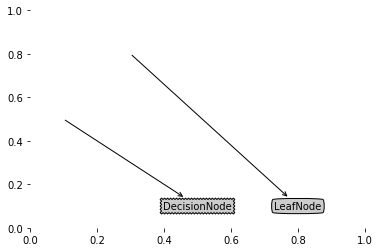

In [37]:
createPlot()


In [38]:
def getNumLeafs(myTree):
    '''获取叶节点数目
    传入：
    myTree：决策树
    返回：
    numLeafs：叶节点数目
    '''
    numLeafs = 0
    firstStr = myTree.keys()[0]    # 根节点
    secondDict = myTree[firstStr]
    for key in secondDict.keys():    # 遍历根节点的孩子节点
        if type(secondDict[key]).__name__ == 'dict':    # 判断是否叶节点
            numLeafs += getNumLeafs(secondDict[key])    # 非叶节点，递归寻找叶节点
        else:
            numLeafs += 1
    return numLeafs

In [39]:
def getTreeDepth(myTree):
    '''获取树的高度
    传入：
    myTree：决策树
    返回：
    maxDepth：树的高度
    '''
    maxDepth = 0
    firstStr = myTree.keys()[0]    # 根节点
    secondDict = myTree[firstStr]
    for key in secondDict.keys():    # 遍历根节点的孩子节点
        if type(secondDict[key]).__name__ == 'dict':    # 判断是否叶节点
            thisDepth = 1 + getTreeDepth(secondDict[key])    # 非叶节点，深度加1,接着递归寻找叶节点
        else:
            thisDepth = 1
        if thisDepth > maxDepth:    # 更新深度
            maxDepth = thisDepth
    return maxDepth

上述程序两个函数具有相同的结构，上面的代码说明了Python字典类型中存储的树的信息。第一个关键字是第一次划分数据集的类别标签，附带的数值表示字节点的取值。从第一个关键字出发，我们可以遍历整棵树的所有字节点。如果字节点的字典类型，则该节点也是一个判断节点，需要调用getNumLeafs()函数。

In [40]:
def retrieveTree(i):
    '''返回棵树
    传入：
    i：index
    返回：两棵树，根据index返回其中返回一棵
    '''
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}},\
                                                             1: 'no'}}}}]
    return listOfTrees[i]

In [41]:
myTree = retrieveTree(0)
print 'the numbers of leaf:', getNumLeafs(myTree)
print 'the height of tree:', getTreeDepth(myTree)

the numbers of leaf: 3
the height of tree: 2


In [44]:
def plotMidText(cntrPt, parentPt, txtString):
    '''绘制连接线上的文本
    cntrPt：子节点坐标
    paretPt：父节点坐标
    txtString：绘制的文本
    '''
    # 计算坐标
    xMid = (parentPt[0] - cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)    # 在绘图区域ax1绘制
    
def plotTree(myTree, parentPt, nodeTxt):
    '''绘制决策树
    myTree：决策树字典
    parentPt：父节点坐标
    nodeTxt：节点文本呢
    '''
    numLeafs = getNumLeafs(myTree)    # 叶节点数目
    depth = getTreeDepth(myTree)    # 树的高度
    firstStr = myTree.keys()[0]    # 根节点
    print "numberLeaf:", numLeafs
    cntrPt = (plotTree.xOff + (1.0+float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)    # 节点坐标
    plotMidText(cntrPt, parentPt, nodeTxt)    # 绘制节点文本
    plotNode(firstStr, cntrPt, parentPt, decisionNode)    # 绘制节点
    secondDict = myTree[firstStr]    # 根节点孩子节点
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD    # 绘制完叶节点，yOff升一层
    for key in secondDict.keys():    # 遍历根节点的孩子节点
        if type(secondDict[key]).__name__ == 'dict':    # 是否叶节点
            plotTree(secondDict[key], cntrPt, str(key))    # 递归寻找叶节点
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW    # 更新横坐标
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)    # 绘制节点
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))    # 绘制箭头文本
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD    # 绘制完叶节点，yOff升一层
def createPlot(inTree):
    '''绘制函数
    '''
    fig = plt.figure(1, facecolor = 'white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon= False, **axprops)    #创建绘图区
    plotTree.totalW = float(getNumLeafs(inTree))    # 全局变量，叶节点数目
    plotTree.totalD = float(getTreeDepth(inTree))    #全局变量，树的高度
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()

numberLeaf: 3
numberLeaf: 2


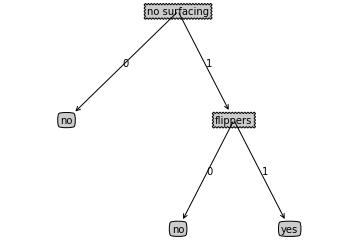

In [46]:
myTree = retrieveTree(0)
createPlot(myTree)

## 3.3 测试和存储分类器
下面介绍实际应用中如何使用分类器，在真实数据上使用决策树分类算法，验证它是否可以正确预测出患者应该使用的隐形眼镜类型。
### 3.3.1 测试算法：使用决策树执行分类
在执行数据分类时，需要使用决策树以及构造决策树的标签向量。程序比较测试数据与决策树上的数值，递归执行该过程知道进入叶子节点，最后将测试数据定义为叶子节点所属的类型。

In [47]:
def classify(inputTree, featLabels, testVec):
    '''决策树分类器
    传入：
    inputTree：构造好的决策树
    featLabels：决策树真实类标
    testVct：测试用例
    返回：
    classLabel：预测类标'''
    firstStr = inputTree.keys()[0]    # 根节点
    secondDict = inputTree[firstStr]    # 根节点的孩子节点
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)    # 递归直至叶节点
            else:
                classLabel = secondDict[key]    # 该分支的类标
    return classLabel

In [48]:
myDat, labels = createDataSet()
myTree = retrieveTree(0)

In [49]:
classify(myTree,labels,[1,0])

'no'

### 3.3.2 使用算法：决策树的存储
构造决策树是很耗时的任务，即使处理很小的数据集。为了节省计算时间，最好能够在每次执行分类时调用一斤构造好的决策树。为了解决这个问题，需要使用Python模块pickle序列化对象，序列化对象可以在磁盘上保存对象，并在需要的时候读取出来。任何对象都可以执行序列化操作，字典对象也不例外。

In [24]:
import pickle
def storeTree(inputTree, filename):
    fw = open(filename, 'w')
    pickle.dump(inputTree, fw)
    fw.close()
def grabTree(filename):
    fr = open(filename)
    return pickle.load(fr)

## 3.4 示例：使用决策树预测隐形眼镜类型
1. 收集数据：提供的文本
2. 准备数据：解析tab分隔的数据行
3. 分析数据：快速检查数据，确保正确地解析数据内容，使用createPlot()函数绘制最终的树形图
4. 训练算法：使用3.1节的createTree()函数
5. 测试算法：编写测试函数验证决策树可以正确分类给定的数据类型
6. 使用算法：存储树的数据结构，以便下次使用时无需重新构造树

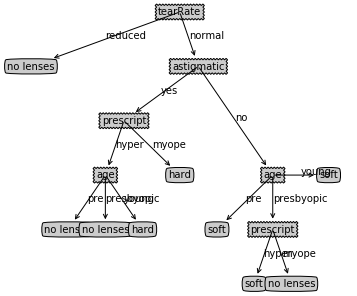

In [25]:
# 收集数据
fr = open('lenses.txt')
# 准备数据
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
# 训练算法
lensesTree = createTree(lenses, lensesLabels)
# 分析数据
createPlot(lensesTree)

上图很好的匹配了实验数据， 然而这些匹配项可能太多了，出现过度匹配问题，为了缓解这个问题，我们可以对决策树进行裁剪，去掉一些不必要的叶子节点，第9章将讨论这个问题。

## 本章小结
决策树分类器就像带有终止块的流程图，终止块表示分类结果。开始处理数据的时候，我们先要测量集合数据的不一致性，也就是熵。基于信息增益的ID3算法可以用于划分标称型数据集，而无法直接处理数值数据。
还有其他流行的决策树构造算法，C4.5、CART和基于基尼不纯度的决策树。